# Nucleos de convolucion no lineales

$$\max \left(\sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i b_i k(x_i, x_j) y_j b_j\right)$$

sujeto a las restricciones
$$\sum_{i=1}^n b_i y_i = 0$$
$$0\le b_i\le \frac{1}{2n\gamma}$$

$k$ se denomina el núcleo (**kernel**) de la SVM
- Caso lineal $k(x_i,x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j) = \phi(x_i)\cdot \phi(x_j)$

- Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$
- Predicción: $k(x_i, p_j) = e^{-\gamma||x_i-p_j||^2}$

- Kernel polinomial homogéneo: $k(x_i, x_j)= (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $(x_i, x_j)= (x_i\cdot x_j +1)^d$
- Kernel de tangente hiperbólica: $(x_i, x_j)= tanh(a x_i\cdot x_j +k)$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

C:\Users\chent\.conda\envs\python6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [131]:
session = tf.Session()

In [132]:
(x_vals,y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)

In [133]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

In [134]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==-1]

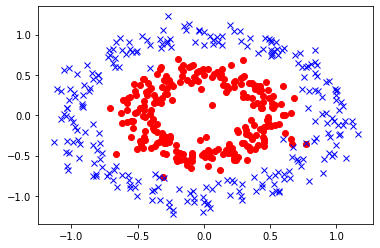

In [135]:
plt.plot(class1_x,class1_y, 'ro', label="Clase 1")
plt.plot(class2_x,class2_y, 'bx', label="Clase 2")
plt.show()

In [150]:
batch_size = 500
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype = tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [151]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), 
                     tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

In [152]:
first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

In [153]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))),tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [154]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [155]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)),tf.float32))

In [156]:
optimizer = tf.train.GradientDescentOptimizer(0.002)
train_step= optimizer.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [157]:
loss_vect = []
batch_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size= batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    
    session.run(train_step, feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vect.append(temp_loss)
    
    acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_acc.append(acc_temp)
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+ ", Pérdida = "+str(temp_loss)+", Precisión = "+str(acc_temp))

Paso #50, Pérdida = 304.63248, Precisión = 0.566
Paso #100, Pérdida = 260.97952, Precisión = 0.606
Paso #150, Pérdida = 144.46536, Precisión = 0.602
Paso #200, Pérdida = 99.38734, Precisión = 0.722
Paso #250, Pérdida = 63.877262, Precisión = 0.698
Paso #300, Pérdida = 31.486729, Precisión = 0.786
Paso #350, Pérdida = 19.985952, Precisión = 0.784
Paso #400, Pérdida = 6.732815, Precisión = 0.864
Paso #450, Pérdida = -1.5842686, Precisión = 0.892
Paso #500, Pérdida = -3.8028946, Precisión = 0.946
Paso #550, Pérdida = -6.692539, Precisión = 0.964
Paso #600, Pérdida = -9.249546, Precisión = 0.944
Paso #650, Pérdida = -8.770085, Precisión = 0.986
Paso #700, Pérdida = -10.135262, Precisión = 0.992
Paso #750, Pérdida = -11.988403, Precisión = 0.986
Paso #800, Pérdida = -11.406277, Precisión = 0.982
Paso #850, Pérdida = -11.495594, Precisión = 0.988
Paso #900, Pérdida = -11.989261, Precisión = 0.988
Paso #950, Pérdida = -12.478878, Precisión = 0.986
Paso #1000, Pérdida = -12.449889, Precisión =

In [158]:
x_min, x_max = x_vals[:,0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:,1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.02), np.arange(y_min,y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points

array([[-2.13287881, -2.22420722],
       [-2.11287881, -2.22420722],
       [-2.09287881, -2.22420722],
       ...,
       [ 2.10712119,  2.21579278],
       [ 2.12712119,  2.21579278],
       [ 2.14712119,  2.21579278]])

In [159]:
[grid_predictions] = session.run(prediction, feed_dict={x_data:x_vals, y_target: np.transpose([y_vals]), 
                                                        prediction_grid: grid_points})

In [160]:
grid_predictions = grid_predictions.reshape(xx.shape)

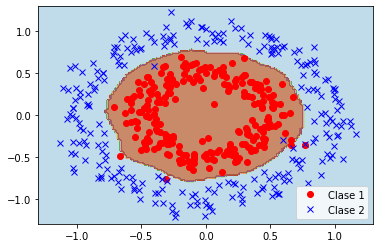

In [162]:
plt.contourf(xx,yy, grid_predictions, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, 'ro', label="Clase 1")
plt.plot(class2_x, class2_y, 'bx', label="Clase 2")
plt.legend(loc="lower right")
plt.xlim([-1.3, 1.3])
plt.ylim([-1.3, 1.3])
plt.show()

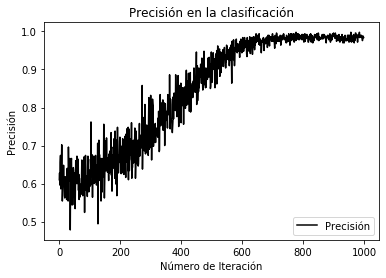

In [163]:
plt.plot(batch_acc, 'k-', label="Precisión")
plt.title("Precisión en la clasificación")
plt.xlabel("Número de Iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.show()

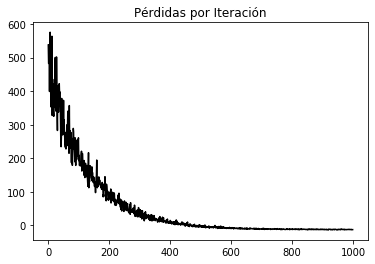

In [164]:
plt.plot(loss_vect, 'k-')
plt.title("Pérdidas por Iteración")
plt.show()

In [166]:
import sympy